# Анализ бизнес-показателей

## Содержание
 1. Загрузка данных и подготовка их к анализу
 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии
 3. Исследовательский анализ данных
 4. Маркетинг
 5. Оценка окупаемости рекламы для привлечения пользователей
 6. Выводы

**Описание проекта:**

Требуется провести анализ развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев бизнес компании постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Цель исследования**: определить причины, по которым вложения в рекламу не окупаются. Выработать рекомендации, как увеличить окупаемость рекламы.

Исследование пройдет в несколько этапов:
1. Загрузим данные и подготовим их к анализу.
2. Зададим функции, которые необходимы для расчета и анализа LTV, ROI, удержания и конверсии, а также для визуализации полученных данных.
3. Проведем исследовательский анализ данных с помощью заданных функций: создадим профили пользователей, посмотрим, их географию, какими устройствами они пользуются, через какие каналы привлечения приходят. Определим, как соотносятся данные по платящим пользователям и всем остальным.
4. Оценим показатели маркетинга: посмотрим сумму расходов на рекламу, распределение затрат по каналам продаж, динамику стоимости привлечения пользователей по каналам продаж.
5. Проведем оценку окупаемости рекламы для привлечения пользователей: общую, с разбивкой по устройствам, по странам, по рекламным каналам. Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.
6. Сделаем выводы.

## 1. Загрузка данных и подготовка их к анализу

In [1]:
#загрузим нужные библиотеки и функции
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Загрузим данные о визитах, заказах и расходах:

 -   /visits_info_short.csv
 -   /orders_info_short.csv 
 -   /costs_info_short.csv

Прочитаем файлы из папки, в которой они хранятся, и сохраним их:

In [2]:
files = ['visits_info_short', 'orders_info_short', 'costs_info_short']
       
df = {}
for name in files:
    pth1 = '/Users/taisiia.prokhorova/Documents/Яндекс/проекты/business_analytics/' + str(name) + '.csv'
    pth2 = '/datasets/' + str(name) + '.csv'
    if os.path.exists(pth1):
        df[name] = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        df[name] = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Выведем на экран общую информацию о таблицах и первые 5 строк:

In [3]:
files = ['visits_info_short', 'orders_info_short', 'costs_info_short']
for name in files:
    print(name)
    df[name].info()
    display(df[name].head())
    print('')

visits_info_short
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



orders_info_short
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



costs_info_short
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Описание данных

У нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

Таблица `visits_log_short` (лог сервера с информацией о посещениях сайта):

   - `User Id` — уникальный идентификатор пользователя
   - `Device` — категория устройства пользователя
   - `Session start` — дата и время начала сессии
   - `Session End` — дата и время окончания сессии
   - `Channel` — идентификатор рекламного источника, из которого пришел пользователь
   - `Region` - страна пользователя

Таблица `orders_log_short` (информация о заказах):

   - `User Id` — уникальный id пользователя, который сделал заказ
   - `Event Dt` — дата и время покупки
   - `Revenue` — выручка

Таблица `costs_short` (информация о затратах на маркетинг):

   - `Channel` — идентификатор рекламного источника
   - `Dt` — дата
   - `Costs` — затраты на этот рекламный источник в этот день
   
В таблицах нет пропущенных значений.

Переименуем названия столбцов в таблицах в соответствии с принятыми правилами стиля:

In [4]:
#приведем названия столбцов к нижнему регистру
#заменим пробелы в названиях на "_"
files = ['visits_info_short', 'orders_info_short', 'costs_info_short']
for name in files:
    df[name].columns = df[name].columns.str.lower()
    df[name] = df[name].rename(columns=lambda col: col.replace(" ", "_"))

In [5]:
#проверим результат переименования столбцов
files = ['visits_info_short', 'orders_info_short', 'costs_info_short']
for name in files:
    print(name)
    df[name].info()
    print('')

visits_info_short
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

orders_info_short
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

costs_info_short
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0

Проверим наличие в таблицах дубликатов строк:

In [6]:
files = ['visits_info_short', 'orders_info_short', 'costs_info_short']
for name in files:
    print(f'Количество дубликатов в таблице', name, ':', df[name].duplicated().sum()) 

Количество дубликатов в таблице visits_info_short : 0
Количество дубликатов в таблице orders_info_short : 0
Количество дубликатов в таблице costs_info_short : 0


Дубликатов нет.

Переименуем названия таблиц для удобства дальнейшего анализа:

In [7]:
visits = df['visits_info_short']
orders = df['orders_info_short']  
ad_costs  = df['costs_info_short'] 

Преобразуем данные о времени в таблицах в формат даты и времени:

In [8]:
#преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date 

Мы привели названия столбцов к единому стилю, проверили наличие дубликатов в таблицах и перевели дату и время в нужный формат.
Теперь можно приступать к анализу данных.

## 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

Для анализа нам необходимо расчитать следующие показатели:
- `Retention Rate` (Коэффициент удержания) - показатель, который показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды. `Retention Rate` = `Количество активных пользователей на текущий день` / `Количество активных пользователей на первый день`.
- `Conversion Rate` (Коэффициент конверсии, CR) — процент пользователей когорты, совершивших какое-нибудь действие. Например, зарегистрировавшихся на сайте, кликнувших по баннеру или совершивших покупку. `Conversion Rate` = `Накопленное количество новых покупателей на текущий день` / `Количество активных пользователей на первый день`.
- `LTV` (Lifetime Value) — общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок (обычно за определенный срок, например, за первые 1, 3, 7 и 14 дней после регистрации). Расчет: `LTV` = `Общая выручка за текущий день` / `Размер когорты`.
- `CAC` (Customer Acquisition Cost) — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. Расчет: `CAC` = `Расходы на рекламу` / `Размер когорты`. 
- `ROI` (Return On Investment) — окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC, или на сколько процентов «окупились» клиенты. Расчет `ROI` = `LTV` / `CAC`. 

Зададим функции для расчета и визуализации необходимых для анализа показателей:
- `get_profiles()` - функция для создания пользовательских профилей
- `get_retention()` - функция для расчёта удержания 
- `get_conversion()` - функция для расчёта конверсии
- `get_ltv()` - функция для расчёта LTV и ROI
- `plot_retention()` - функция для визуализации удержания
- `plot_conversion()` - функция для визуализации конверсии
- `plot_ltv_roi()` - функция для визуализации LTV и ROI

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Теперь мы можем перейти к исследовательскому анализу данных.

## 3. Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

**3.1. Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.**

In [17]:
#создание профилей пользователей
profiles = get_profiles(visits, orders, ad_costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Значит моментом анализа мы можем установить дату 27 октября 2019 года, а горизонтом анализа - 14 дней.

Минимальной датой привлечения пользователей в этом случае будет 1 мая 2019 года, а максимальной датой - 14 мая 2019 года. 

In [18]:
#зададим момент и горизонт анализа
observation_date = datetime(2019, 10, 27).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

**3.2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.** 

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны для всех пользователей или для привлеченных пользователей.

In [19]:
#создадим сводную таблицу с данными по количеству пользователей и доле платящих пользователей 
#для всех пользователей

country = profiles.groupby(
    'region').agg({'user_id': 'nunique', 'payer': 'mean'}
                 ).sort_values(by='payer', ascending=False
                              ).rename(columns={'user_id': 'user_quantity', 'payer': 'payer_rate'}
                                      )
country['payer_rate'] = round(country['payer_rate'] *100, 2)
display(country)

,user_quantity,payer_rate
region,,
United States,100002,6.90
Germany,14981,4.11
UK,17575,3.98
France,17450,3.80


In [20]:
#создадим сводную таблицу с данными по количеству пользователей и доле платящих пользователей 
#для привлеченных пользователей

profiles_non_organic = profiles.query('channel != "organic"')

country = profiles_non_organic.groupby(
    'region').agg({'user_id': 'nunique', 'payer': 'mean'}
                 ).sort_values(by='payer', ascending=False
                              ).rename(columns={'user_id': 'user_quantity', 'payer': 'payer_rate'}
                                      )
country['payer_rate'] = round(country['payer_rate'] *100, 2)
display(country)

,user_quantity,payer_rate
region,,
United States,61829,9.88
Germany,9528,5.14
UK,11154,5.10
France,11058,5.01


- Большинство пользователей приходится на США - 100 тыс. человек против 15-17 тыс. в остальных странах. 
- Среди привлеченных пользователей также больше всего пользователей из США (62 тыс. чел.).
- В США наиболее высока доля платящих пользователей (6,9% для всех, 9,9% для привлеченных пользователей).

**3.3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.**

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [21]:
#создадим сводную таблицу с данными по количеству пользователей и доле платящих пользователей 
#для всех пользователей

device = profiles.groupby(
    'device').agg({'user_id': 'nunique', 'payer': 'mean'}
                 ).sort_values(by='payer', ascending=False
                              ).rename(columns={'user_id': 'user_quantity', 'payer': 'payer_rate'}
                                      )
device['payer_rate'] = round(device['payer_rate'] *100, 2)
display(device)

,user_quantity,payer_rate
device,,
Mac,30042,6.36
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05


In [22]:
#создадим сводную таблицу с данными по количеству пользователей и доле платящих пользователей 
#для привлеченных пользователей

device = profiles_non_organic.groupby(
    'device').agg({'user_id': 'nunique', 'payer': 'mean'}
                 ).sort_values(by='payer', ascending=False
                              ).rename(columns={'user_id': 'user_quantity', 'payer': 'payer_rate'}
                                      )
device['payer_rate'] = round(device['payer_rate'] *100, 2)
display(device)

,user_quantity,payer_rate
device,,
Mac,18693,8.95
iPhone,33882,8.77
Android,21841,8.16
PC,19153,6.76


- Большинство пользователей используют iPhone (54,5 тыс. чел. всего, 33,9 тыс. привлеченных пользователей). 
- Среди пользователей Mac (6,4% для всех, 8,9% для привлеченных) и iPhone (6,2% для всех, 8,8% для привлеченных) наиболее велика доля платящих пользователей.

**3.4. Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.**

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [23]:
#создадим сводную таблицу с данными по количеству пользователей и доле платящих пользователей

channel = profiles.groupby(
    'channel').agg({'user_id': 'nunique', 'payer': 'mean'}
                 ).sort_values(by='payer', ascending=False
                              ).rename(columns={'user_id': 'user_quantity', 'payer': 'payer_rate'}
                                      )
channel['payer_rate'] = round(channel['payer_rate'] *100, 2)
display(channel)

,user_quantity,payer_rate
channel,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


- Большинство пользователей являются органическими (56,4 тыс. чел.), т.е. пришли без помощи рекламных каналов. 
- Среди каналов привлечения лидирует FaceBoom (29,1 тыс. чел.) 
- Среди пользователей, привлеченных через  FaceBoom (12,2%), AdNonSense (11,3%), lambdaMediaAds (10,5%) наибольшая доля платящих пользователей. Среди органических пользователей доля платящих пользователей наименьшая (2,1%).

## 4. Маркетинг

**4.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.**

In [24]:
#общая сумма расходов на маркетинг
print(f'Общие затраты на маркетинг:', int(ad_costs['costs'].sum()), 'долларов.')

Общие затраты на маркетинг: 105497 долларов.


In [25]:
#сумма расходов на маркетинг по каждому источнику
display(
    ad_costs.groupby('channel')
    .agg({'costs': 'sum'})
    .sort_values(by='costs', ascending=False)
) 

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего было затрачено на рекламу через два канала -  TipTop (54,8 тыс. долларов) и FaceBoom (32,4 тыс. долларов).

Посмотрим, как распределены расходы на маркетинг по дням: 

Text(0.5, 1.0, 'Затраты на маркетинг, $')

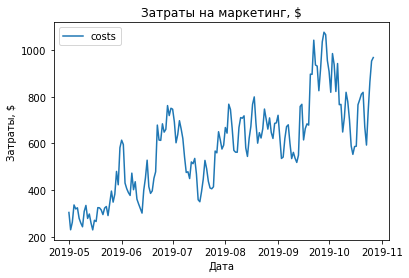

In [26]:
#визуалируем сумму расходов на маркетинг по времени

ad_costs.groupby('dt').agg({'costs': 'sum'}).sort_values(by='dt', ascending=False).plot()
plt.xlabel('Дата')
plt.ylabel('Затраты, $')
plt.title('Затраты на маркетинг, $')

Посмотрим динамику по каналам продаж по месяцам:

Text(0.5, 1.0, 'Затраты на маркетинг, $')

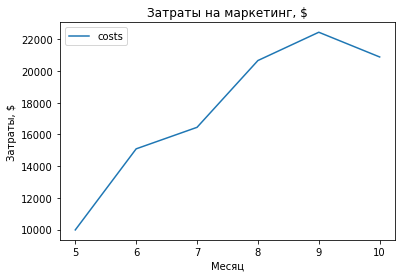

In [27]:
#визуалируем сумма расходов на маркетинг по времени
ad_costs['month'] = pd.to_datetime(ad_costs['dt']).dt.month 

ad_costs.groupby('month').agg({'costs': 'sum'}).sort_values(by='month', ascending=False).plot()
plt.xlabel('Месяц')
plt.ylabel('Затраты, $')
plt.title('Затраты на маркетинг, $')

Посмотрим затраты на маркетинг по рекламным каналам по месяцам:

Text(0.5, 1.0, 'Затраты на маркетинг по рекламным каналам, $')

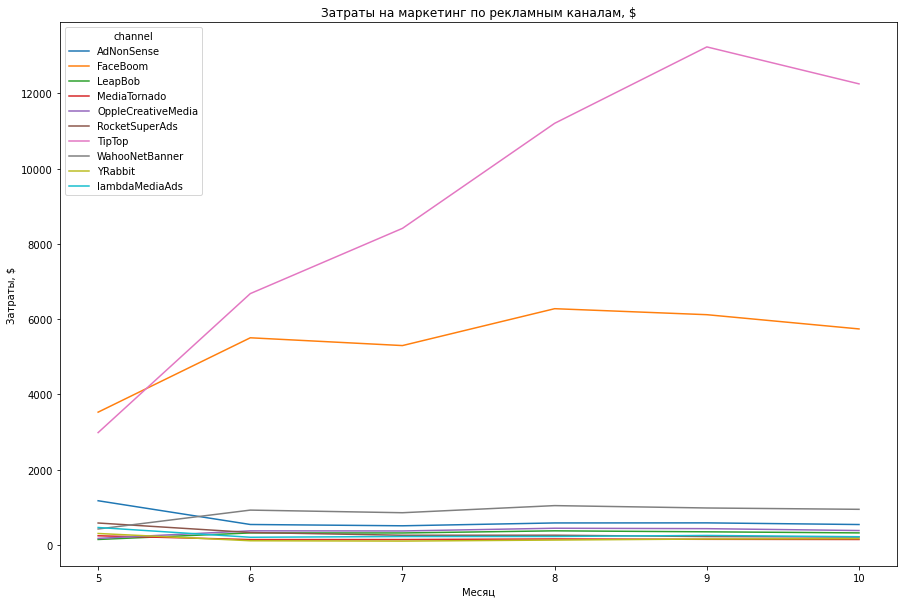

In [28]:
#добавим столбец с месяцем проведения рекламной компании
#сделаем сводную таблицу с затратами по каналам продаж по месяцам
#визуализируем данные на диаграмме
ad_costs['month'] = pd.to_datetime(ad_costs['dt']).dt.month 

costs_dinamics = ad_costs.pivot_table(
            index='channel', columns='month', values='costs', aggfunc='sum'
        )
costs_dinamics.T.plot(figsize=(15, 10))
plt.xlabel('Месяц')
plt.ylabel('Затраты, $')
plt.title('Затраты на маркетинг по рекламным каналам, $')

**Вывод**

Мы видим, что расходы на маркетинг растут за счет канала TipTop. Затраты по остальным каналам остаются на прежднем уровне.

**4.2. Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника.**

Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.

Рассчитаем средний CAC на одного пользователя для всего проекта. Для начала найдем LTV (сумму средств, которую приносит один клиент) в разбивке по каналам привлечения:

In [29]:
# находим LTV с разбивкой по каналам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

Отфильтруем пользовательские профили методом `query()`: возьмём лишь те, что участвуют в расчёте LTV. Результат сохраним в новой переменной — `ltv_profiles`.

In [30]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

Рассчитаем средний CAC на одного пользователя для всего проекта. Для этого разделим общую сумму затрат на маркетинг на количество клиентов, привлеченных по рекламным каналам:

In [31]:
#исключим из числа пользователей органических
cac_total = ltv_profiles['acquisition_cost'].sum() / ltv_profiles[ltv_profiles['channel'] != 'organic']['user_id'].count()
print(f'Средние затраты на привлечение одного пользователя:', round(cac_total, 2), 'долларов.')

Средние затраты на привлечение одного пользователя: 1.11 долларов.


Рассчитаем средний CAC по каждому каналу привлечения (источника трафика). Для этого сгруппируем отфильтрованные профили и применим функцию `mean()` к значениям столбца `acquisition_cost`. Сохраним результат в переменную `cac`, изменив название столбца `acquisition_cost` на `cac`.

In [32]:
# считаем средний CAC по каналам привлечения

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

,cac
channel,
TipTop,2.733487
FaceBoom,1.113659
AdNonSense,1.008023
lambdaMediaAds,0.726839
WahooNetBanner,0.601685
RocketSuperAds,0.420648
OppleCreativeMedia,0.249905
MediaTornado,0.219005
YRabbit,0.216684


Посмотрим стоимость привлечения по каналам продаж по месяцам:

In [33]:
cac_dinamics = ltv_profiles.pivot_table(
            index='channel', columns='month', values='acquisition_cost', aggfunc='mean'
        )
display(cac_dinamics)

month,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
channel,,,,,,
AdNonSense,1.027856,1.012500,0.992126,0.995876,1.004663,0.980729
FaceBoom,1.105868,1.116748,1.113652,1.112088,1.114434,1.118869
LeapBob,0.201842,0.211696,0.209859,0.210478,0.210385,0.211819
MediaTornado,0.226768,0.218354,0.215365,0.224325,0.210962,0.209604
OppleCreativeMedia,0.243544,0.249831,0.251544,0.250142,0.250586,0.250631
RocketSuperAds,0.549411,0.498798,0.417334,0.354000,0.302493,0.290530
TipTop,1.357468,2.077684,2.650552,3.011290,3.480405,3.554895
WahooNetBanner,0.577655,0.598441,0.607709,0.605941,0.601477,0.610182
YRabbit,0.281144,0.182788,0.161493,0.191908,0.213992,0.222766


Дороже всего стоит привлечение пользователей через TipTop (2,7 долл.) и FaceBoom (1,1 долл.).

## 5. Оценка окупаемости рекламы для привлечения пользователей

С помощью показателей LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

### Проанализируем общую окупаемость рекламы

Рассчитаем LTV, CAC и ROI. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
Исключим из анализа органических пользователей, поскольку стоимость их привлечения равна нулю.

In [34]:
# рассчитаем LTV и ROI
profiles_non_organic = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic, orders, observation_date, horizon_days
)

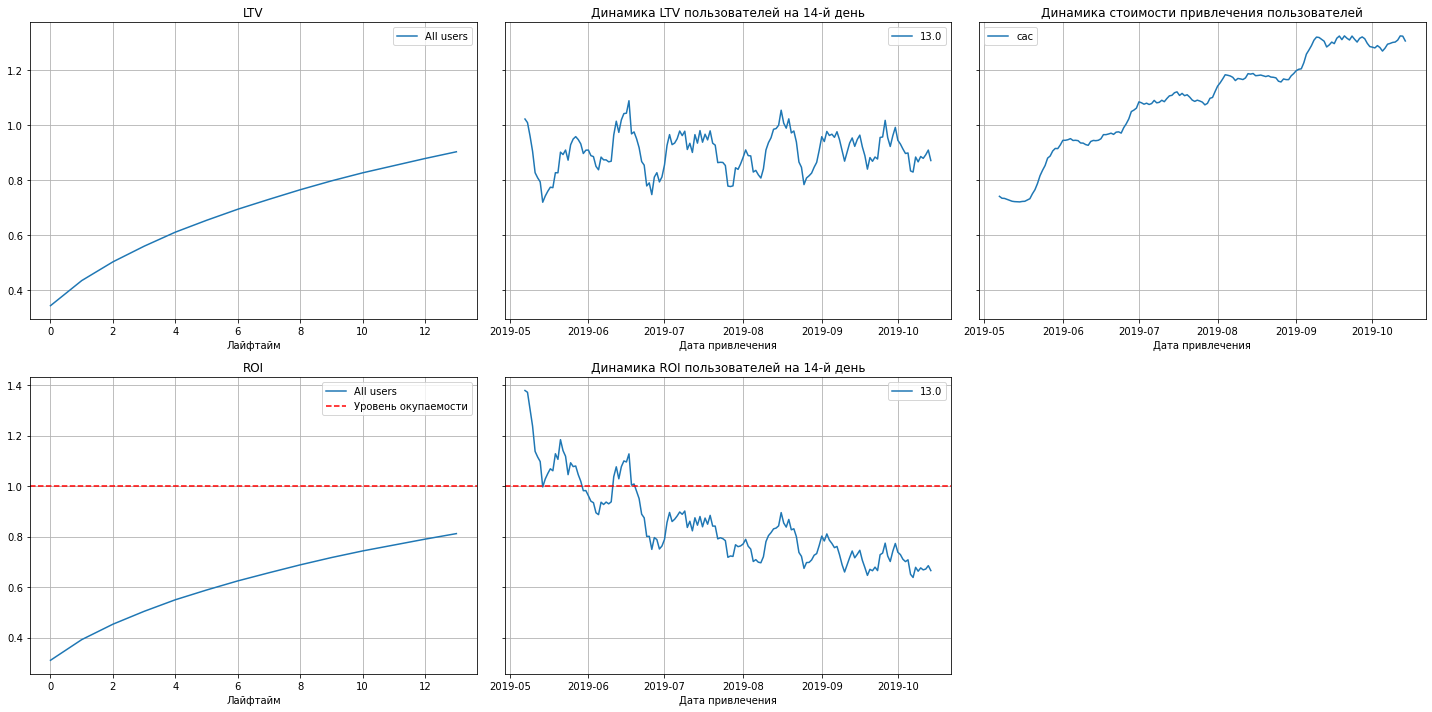

In [35]:
# визуализируем LTV и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**

- Реклама, направленная на привлечение пользователей, в целом не окупается - ROI не достигает 1 к 14 дню "жизни" пользователей. 
- При этом динамика ROI на 14-й день показывает, что окупаемость рекламы постоянно снижается. До июня 2019 года реклама окупалась.
- LTV на 14-й день остается на одном уровне в течение периода наблюдений - от 0,8 до 1,0 долл. на 1 чел.
- Стоимость привлечение пользователя (CAC) растет - от 0,8 долл. до 1,3 долл.

Таким образом, можно предположить, что снижение окупаемость рекламы связано с тем, что покупки клиентов ограничены определенной суммой (например, стоимостью приложения). В то же время CAC может расти по причине роста стоимости рекламы на каналах, заказе рекламы в более дорогих каналах или использовании менее эффективных рекламных каналов (которые привлекают меньше пользователей).
Посмотрим показатели более детально.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

Рассчитаем LTV, CAC и ROI. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
Исключим из анализа органических пользователей, поскольку стоимость их привлечения равна нулю.

In [36]:
# рассчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic, orders, observation_date, horizon_days, dimensions=['device']
)

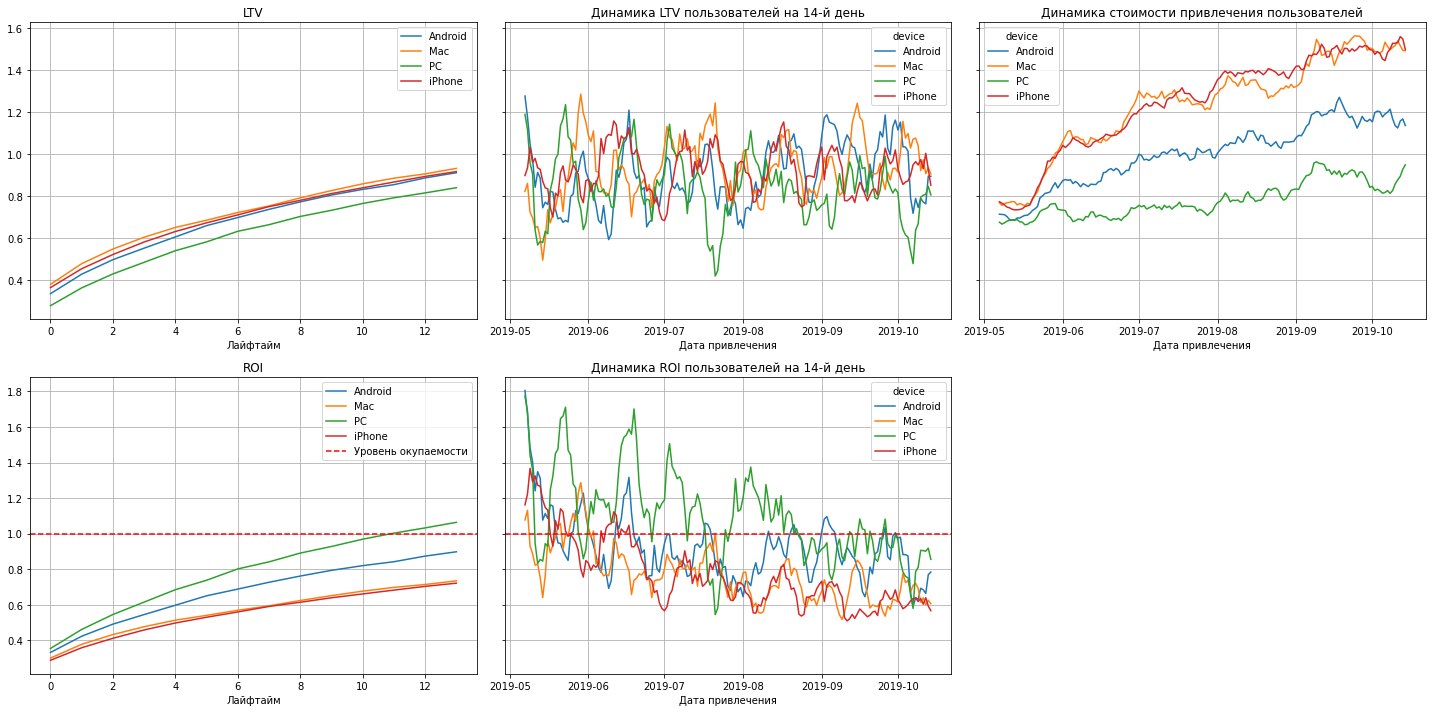

In [37]:
# визуализируем LTV и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**

- Реклама окупается только для PC, для остальных устройств на 14 день "жизни" пользователей ROI не достигает 1.
- Динамика ROI на 14-й день показывает, что окупаемость рекламы снижается. К сентябрю 2019 года ни для одного устройства ROI не достигает 1. 
- LTV на 14-й день остается в одном диапазоне в течение периода наблюдений - от 0,6 до 1,2 долл. на 1 чел.
- Стоимость привлечение пользователя (CAC) растет неравномерно для разных устройств - в мае стоимость привлечения 1 пользователя была примерно одинакова для каждого из типов устройств. Для PC стоимость почти не выросла, при этом для Mac и iPhone стоимость выросла почти в 2 раза (с 0,8 долл. до 1,6 долл.). 

Таким образом, Mac и iPhone оказывают негативное влияние на окупаемость рекламы.

### Проанализируйте окупаемость рекламы с разбивкой по странам

Рассчитаем LTV, CAC и ROI. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Исключим из анализа органических пользователей, поскольку стоимость их привлечения равна нулю.

In [38]:
# рассчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic, orders, observation_date, horizon_days, dimensions=['region']
)

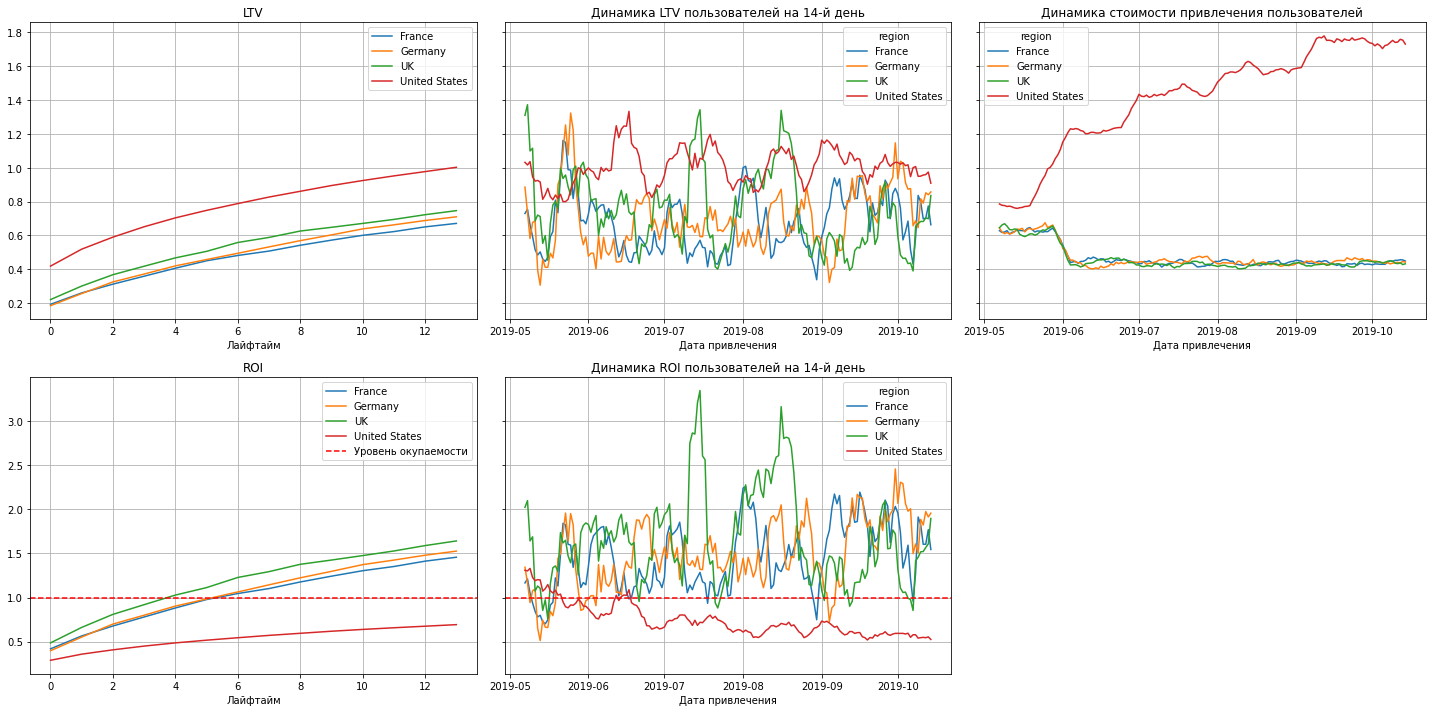

In [39]:
# визуализируем LTV и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**

- LTV для пользователей из США выше, чем по другим странам. При этом только в США реклама не окупается на 14-й день - ROI не достигает 1 к 14 дню.
- Динамика ROI на 14-й день показывает, что окупаемость по всем странам, кроме США, остается выше 1 (т.е. реклама окупается). В США реклама окупалась в начале мая 2019 года, но почти сразу перестала. 
- По динамики стоимости привлечение пользователя (CAC) отчетливо видно, что стоимость привлечения пользователей во всех странах, кроме США, снизилась в июне 2019 года и далее оставалась на одном уровне. В США стоимость привлечения пользователей постоянно растет от 0,8 долл. до 1,8 долл. на 1 чел.

Таким образом, есть проблемы с рекламой в США. Необходимо проверить, что за каналы используются для привлечения клиентов из этой страны.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

Рассчитаем LTV, CAC и ROI. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Исключим из анализа органических пользователей, поскольку стоимость их привлечения равна нулю.

In [40]:
# рассчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

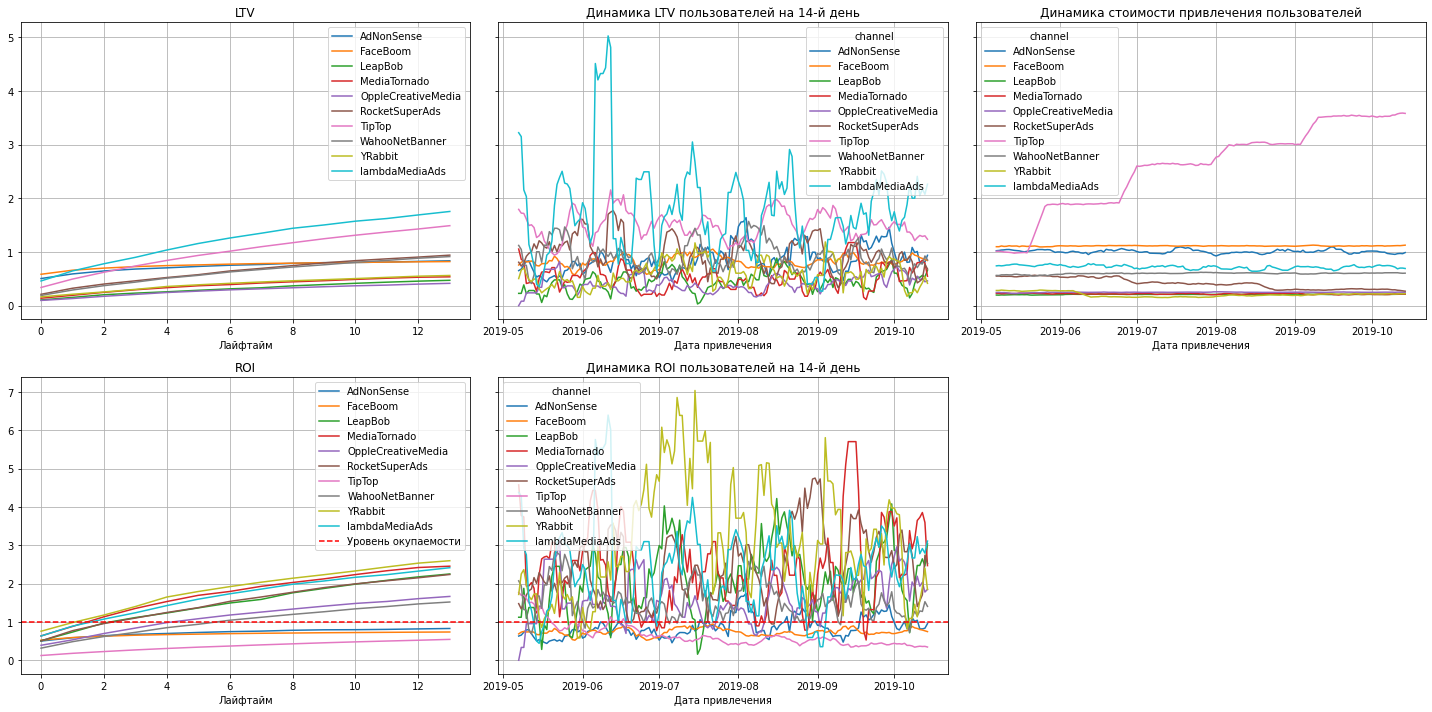

In [41]:
# визуализируем LTV и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**

- Из рекламных каналов не окупаются три: TipTop, FaceBoom, AdNonSense - это три канала с наибольшей стоимостью привлечения пользователей (CAC).
- Отчетливо виден рост CAC для канала TipTop - с 1 до 3,5 долл. Для остальных каналов стоимость остается на одном уровне в течение периода анализа.

Таким образом, есть проблемы с каналом TipTop. Этому может быть несколько причин - проблемы с показом рекламы или переходом на сайт (моделе оплаты СPM - с количества показов или СPC - с количества переходов на сайт) или рост стоимости размещения рекламы через этот канал при сохранении или падении количества привлеченных пользователей.
Необходимо либо пересмотреть методы оплаты рекламы по неприбыльным каналам, либо исключить данные каналы.

### Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Проверим, чем могут быть вызваны проблемы окупаемости. Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

**Изучим конверсию и удержание с разбивкой по устройствам:**

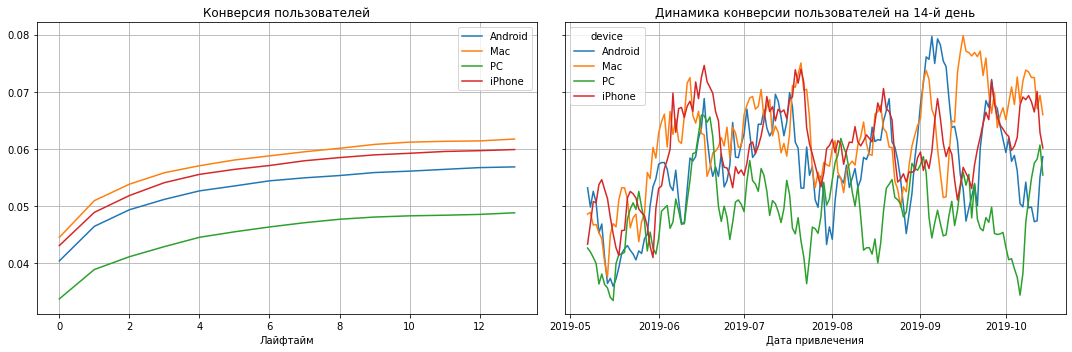

In [42]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

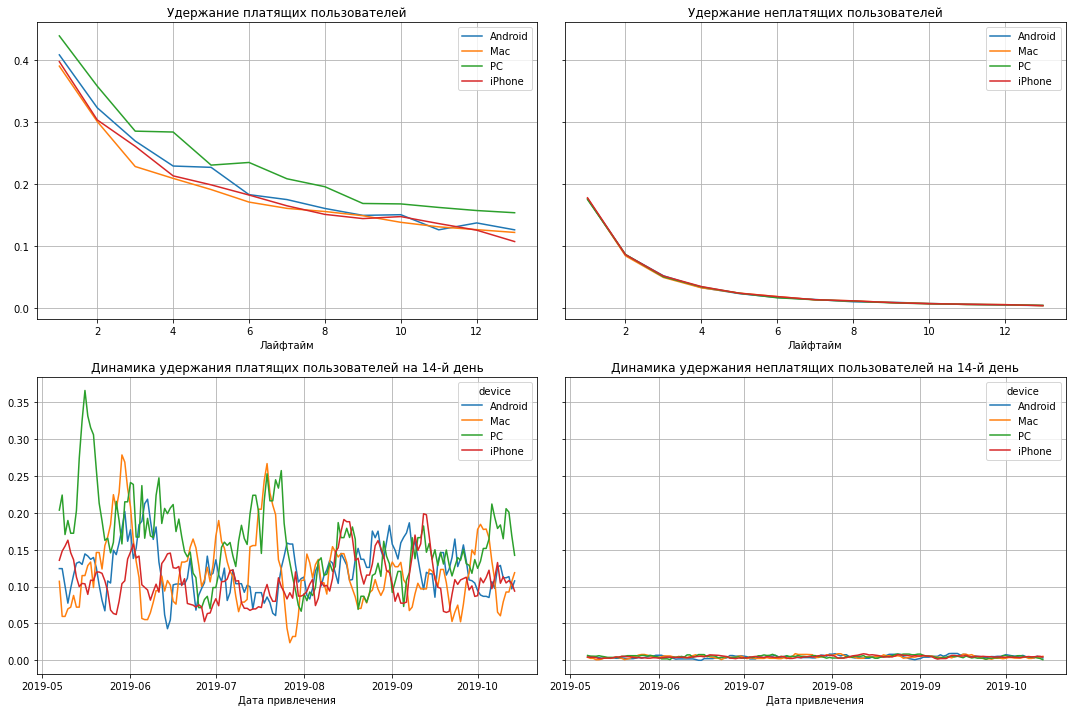

In [43]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**
- Хуже всего конвертируются пользователи PC, лучше всего пользователи Mac. Это может говорить о том, что приложение удобнее для пользователей Mac и они активнее совершают покупки.
- Удержание пользователей для всех устройств снижается до 10-15% на 14 день. При этом лучше всего удерживаются пользователи PC.
- По динамике удержания видно, что удержание пользователей PC снижается. Необходимо проверить, не произшло ли каких-либо изменений в приложении, которые повлияли на снижении удержания пользователей.

**Изучим конверсию и удержание с разбивкой по странам:**

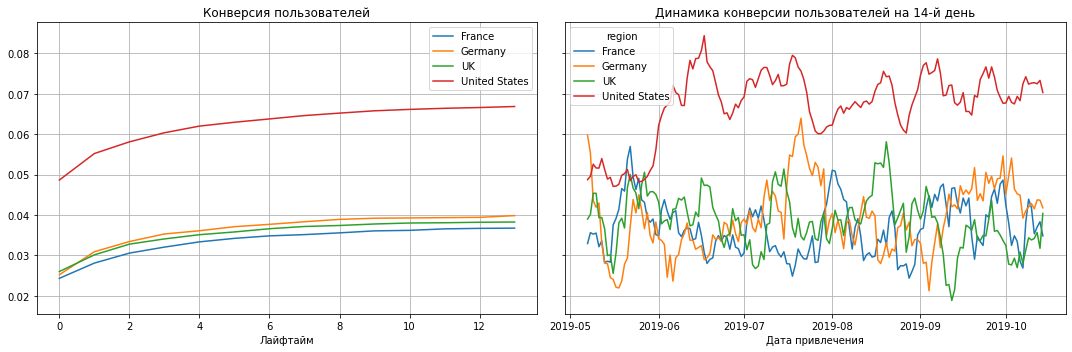

In [44]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

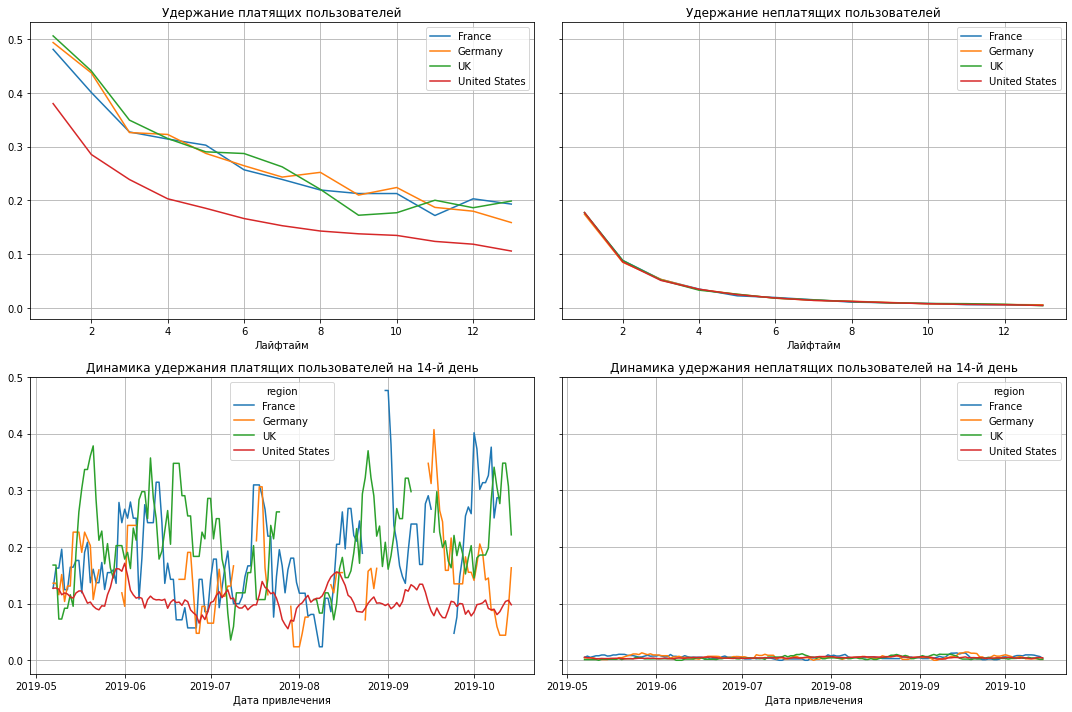

In [45]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**
- Лучше всего конвертируются пользователи из США - 6% пользователей совершают покупку на 14 день против 4% для остальных стран. Приложение интереснее и удобнее для пользователей из США - они охотнее совершают покупку.
- Динамика конверсии пользователей также показывает, что конверсия пользователей из США стабильно выше, чем для других стран.
- При этом удержание пользователей из США ниже, чем по другим странам. На 14-й день в среднем остается 10% пользователей, против 16-20% для остальных стран. Необходимо проверить возможные ошибки в приложении для разных стран. 
Получается, что пользователи из США активнее совершают покупки, при этом они же чаще перестают использовать приложение. 


**Изучим конверсию и удержание с разбивкой по каналам:**

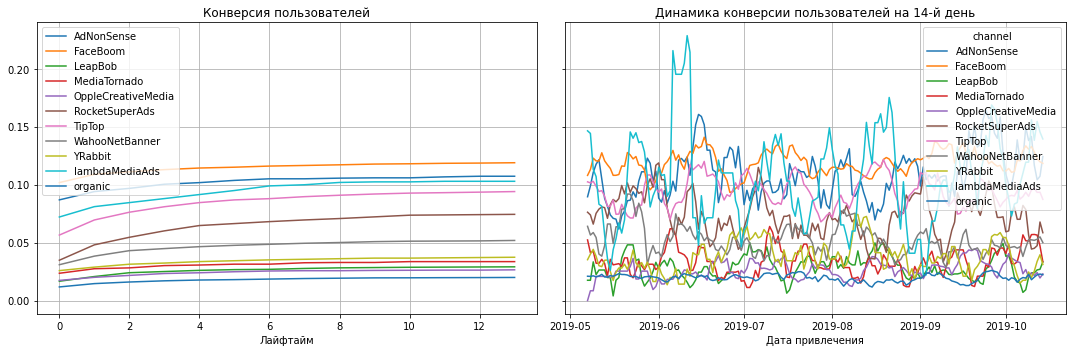

In [46]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

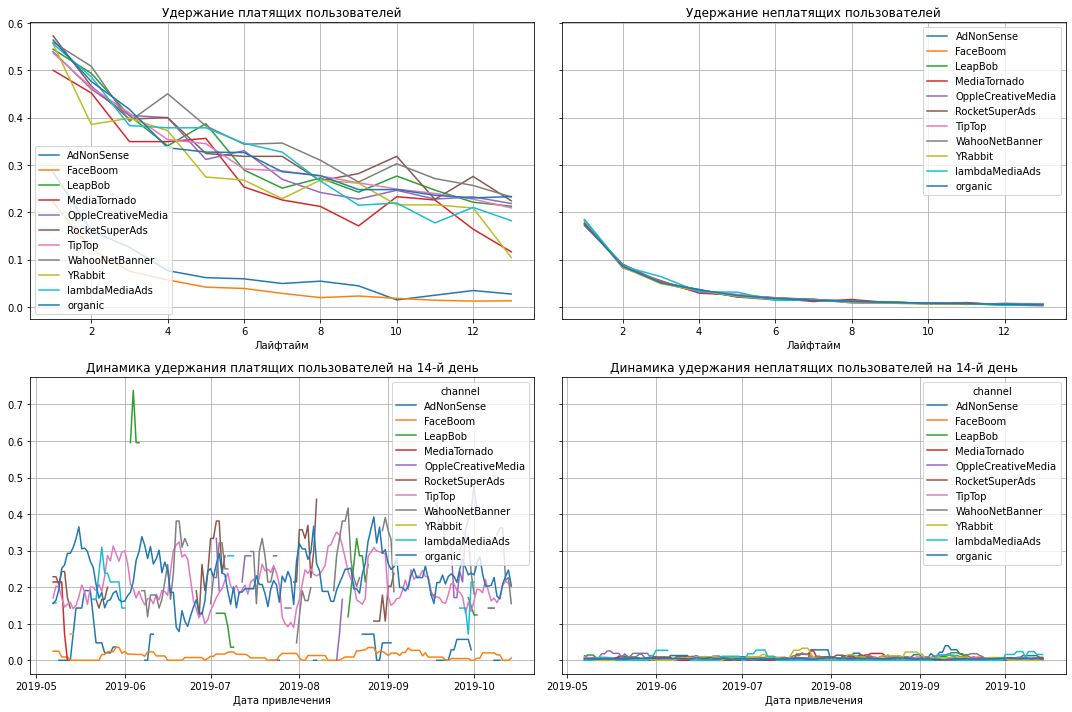

In [47]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

- Выше всего конверсия пользователей из канала FaceBoom.
- Удержание платящих пользователей для двух каналов - AdNonSense и FaceBoom - занчительно ниже, чем для остальных каналов. На 14 день удержание по этим падает почти до нуля, в то время как для остальных каналов оно держится в районе 20%.
- Для FaceBoom удержание на 14 день стабильно держится на низком уровне, в районе 0%.

## 6. Выводы

**Общие данные:**
- Большинство пользователей приходится на США - 100 тыс. человек против 15-17 тыс. в остальных странах. 
- Среди привлеченных пользователей также больше всего пользователей из США (62 тыс. чел.).
- В США наиболее высока доля платящих пользователей (6,9% для всех, 9,9% для привлеченных пользователей).
- Большинство пользователей используют iPhone (54,5 тыс. чел. всего, 33,9 тыс. привлеченных пользователей). 
- Среди пользователей Mac (6,4% для всех, 8,9% для привлеченных) и iPhone (6,2% для всех, 8,8% для привлеченных) наиболее велика доля платящих пользователей.
- Большинство пользователей являются органическими (56,4 тыс. чел.), т.е. пришли без помощи рекламных каналов. 
- Среди каналов привлечения лидирует FaceBoom (29,1 тыс. чел.) 
- Среди пользователей, привлеченных через  FaceBoom (12,2%), AdNonSense (11,3%), lambdaMediaAds (10,5%) наибольшая доля платящих пользователей. Среди органических пользователей доля платящих пользователей наименьшая (2,1%).
- Больше всего было затрачено на рекламу через два канала - TipTop (54,8 тыс. долларов) и FaceBoom (32,4 тыс. долларов).
- Дороже всего стоит привлечение пользователей через TipTop (2,7 долл.) и FaceBoom (1,1 долл.).

**Проблемы с окупаемостью рекламы:**
- Реклама в целом не окупается - ROI на 14 день "жизни" пользователей ниже 1.
- Окупаемость рекламы постоянно снижается. До июня 2019 года реклама окупалась.
- LTV на 14-й день остается на одном уровне в течение периода наблюдений - от 0,8 до 1,0 долл. на 1 чел, а стоимость привлечение пользователя (CAC) растет - от 0,8 долл. до 1,3 долл.

Таким образом, можно предположить, что снижение окупаемость рекламы связано с тем, что покупки клиентов ограничены определенной суммой (например, стоимостью приложения). В то же время CAC может расти по причине роста стоимости рекламы на каналах, заказе рекламы в более дорогих каналах или использовании менее эффективных рекламных каналов (которые привлекают меньше пользователей). 

**Причины неэффективности привлечения пользователей:**

- Стоимость привлечение пользователя (CAC) для Mac и iPhone с мая по октябрь 2019 года выросла почти в 2 раза (с 0,8 долл. до 1,6 долл.), а для PC почти не выросла. Эти устройства оказывают негативное влияние на окупаемость рекламы.
- LTV для пользователей из США выше, чем по другим странам. При этом только в США реклама не окупается на 14-й день - ROI не достигает 1 к 14 дню. Т.е. стоимость рекламы для пользователей из США не окупает их покупки. Кроме того,  в США стоимость привлечения пользователей постоянно растет от 0,8 долл. до 1,8 долл. на 1 чел. Необходимо проверить, что за каналы используются для привлечения клиентов из этой страны.
- Из рекламных каналов не окупаются три: TipTop, FaceBoom, AdNonSense - это три канала с наибольшей стоимостью привлечения пользователей (CAC). CAC для канала TipTop резко вырос с 1 до 3,5 долл. Для остальных каналов стоимость остается на одном уровне в течение периода анализа. Таким образом, есть проблемы с каналом TipTop. Необходимо пересмотреть методы оплаты рекламы для неэффективных каналов, либо исключить их и поискать новые.
- Удержание пользователей для всех устройств снижается до 10-15% на 14 день. При этом лучше всего удерживаются пользователи PC. По динамике удержания видно, что удержание пользователей PC снижается. Необходимо проверить, не произошло ли каких-либо изменений в приложении, которые повлияли на снижении удержания пользователей.
- Лучше всего конвертируются пользователи из США - 6% пользователей совершают покупку на 14 день против 4% для остальных стран. При этом удержание пользователей из США ниже, чем по другим странам. На 14-й день в среднем остается 10% пользователей, против 16-20% для остальных стран. Необходимо проверить возможные ошибки в приложении для разных стран. Получается, что пользователи из США активнее совершают покупки, при этом они же чаще перестают использовать приложение.
- Удержание платящих пользователей для двух каналов - AdNonSense и FaceBoom - значительно ниже, чем для остальных каналов. На 14 день удержание по этим падает почти до нуля, в то время как для остальных каналов оно держится в районе 20%. В случае одиновременной покупки (если пользователь покупает только приложение) это не влияет на прибыльность. Но в случае, если пользователи продолжают совершать покупки в приложении необходимо определить, почему клиенты, пришедшие из данных каналов, перестают пользоваться приложением.

**Рекомендации для заказчика**

- Отказаться от привлечения клиентов через канал TipTop, поскольку он не окупается. 
- Вложить средства в рекламу в продвижение на каналах с высоким ROI: YRabbit, MediaTornado и lambdaMediaAds. По этим каналах доход от привлеченных клиентов более чем в 2 раза превышает затраты на привлечение.